# Part I - Ford GoBike Data Exploration
## by Adewale Olayemi

## Introduction
This dataset contains information about bike trip made in a bike sharing system covering the greater San Francisco Bay area from June 2017 to December 2017. The data includes:

* Trip duration in seconds
* Time trip started
* Time trip ended
* Starting station number and name
* Ending station number and name
* Longitude and Latitude of start and end station
* Bike id-Bike used for the trip
* User type-indicates whether user is a subscriber (registered user) or customer (casual user)
* User year of birth
* User gender





## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [3]:
# Reading the data into a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2017-fordgobike-tripdata.csv')

### Assess

In [4]:
# checking the first five rows of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [ ]:
# checking the size of dataframe
df.shape

(519700, 15)

In [ ]:
# inspecting the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [ ]:
# checking for null values
df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [ ]:
# checking for duplicates
df.duplicated().sum()

0

In [ ]:
# statistics for the numeric columns
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


####  Issues
- start time and end time columns are not in datetime format
- No duration in minutes
- There is no month, days of the week  and period of the day columns
- No age column
- missing values in dataframe

### Clean

In [5]:
# making a copy of the original dataframe
df_clean = df.copy()

`start time and end time columns are not in datetime format`
#### Define
Change the start time and end time columns into a datetime format
#### Code

In [6]:
# convert start time and end time column to datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

#### Test

In [ ]:
# inspecting the data types
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

`duration_sec column is in seconds`
#### Define
Convert the duration_sec to minutes by dividing by 60
#### Code

In [7]:
# dividing seconds by 60 to get minutes
df_clean['duration_minutes'] = df_clean['duration_sec']/60

#### Test

In [ ]:
df_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_minutes
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,762.800000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,1036.200000
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,726.716667


`There is no month, days of the week  and period of the day columns`
#### Define
Extract the month, days of the week,  and period of the day columns from the start_time column
#### Code

In [10]:
# Extracting Month and day of the week name
df_clean['month'] = df_clean['start_time'].dt.month_name()
df_clean['day'] = df_clean['start_time'].dt.day_name()


def time_period(time):
    ''' Parameters:
    time: a datetime column in a dataframe
      This function determine the period of the day, whether it's Morning, Afternoon, or Night 
      and return a pandas series.'''
      
    if time.hour>=12 and time.hour<=17:
        period = 'Afternoon'
    elif time.hour>=0 and time.hour<12:
        period = 'Morning'
    else:
        period = 'Night'
    return(pd.Series(period))
df_clean['period'] = df_clean['start_time'].apply(time_period)

#### Test

In [11]:
df_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_minutes,month,day,period
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667,December,Sunday,Afternoon
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333,December,Sunday,Afternoon
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,762.800000,December,Sunday,Night


`missing values in dataframe`
#### Define
Drop all rows with null values
#### Code

In [12]:
# dropping null values
df_clean.dropna(inplace = True)

#### Test

In [13]:
df_clean.isnull().sum().sum()

0

`No age column`
#### Define
Derive age column from the member_birth_year column
#### Code

In [14]:
# calculating age using the dataset year (2017)
df_clean['user_age'] = 2017 - df_clean['member_birth_year'].astype(int)

#### Test

In [15]:
df_clean.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_minutes,month,day,period,user_age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.166667,December,Sunday,Afternoon,30
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.333333,December,Sunday,Afternoon,52
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,726.716667,December,Sunday,Afternoon,20


`Some columns not needed for the analysis`
#### Define 
Drop the columns that are not required for data exploration and analysis
#### Code

In [16]:
# dropping columns that are not needed for the analysis
df_clean.drop(['duration_sec','start_time', 'end_time','start_station_id', 'end_station_id',
              'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 
               'end_station_longitude', 'bike_id', 'member_birth_year'], axis=1, inplace=True)

#### Test

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_station_name  453159 non-null  object 
 1   end_station_name    453159 non-null  object 
 2   user_type           453159 non-null  object 
 3   member_gender       453159 non-null  object 
 4   duration_minutes    453159 non-null  float64
 5   month               453159 non-null  object 
 6   day                 453159 non-null  object 
 7   period              453159 non-null  object 
 8   user_age            453159 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 34.6+ MB


In [18]:
# Converting month, day and period columns to categorical data type
ordinal_var_dict = {'month': ['June', 'July', 'August','September','October','November','December'],
                    'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'period': ['Morning', 'Afternoon', 'Night']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

### What is the structure of your dataset?

The initial dataset contains 519700 rows and 15 columns. After performing data wrangling(assesing and cleaning), the final dataset contain 453159 rows and 9 columns

### What is/are the main feature(s) of interest in your dataset?

I am interested on the behaviour of the user type and gender with respect to their bike trips

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that user types will have strong influence on the duration spent on trips, and the number of trips in days of the week. I also expect male riders than female riders. In addition, subcriber would likely to be more than customer due the pricing plan

## Univariate Exploration

### What is Distribution of Trip Duration in Minutes?

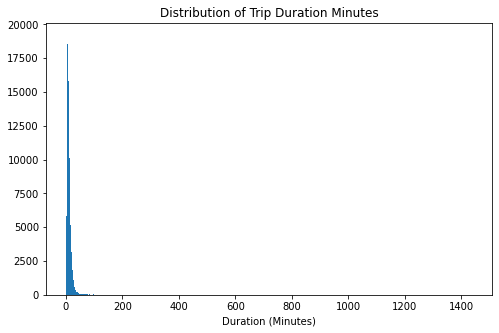

In [19]:
# ploting histogram using standard scale plot
binsize = 0.5
bins = np.arange(1, df_clean['duration_minutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_minutes', bins = bins)
plt.xlabel('Duration (Minutes)')
plt.title('Distribution of Trip Duration Minutes')
plt.show()

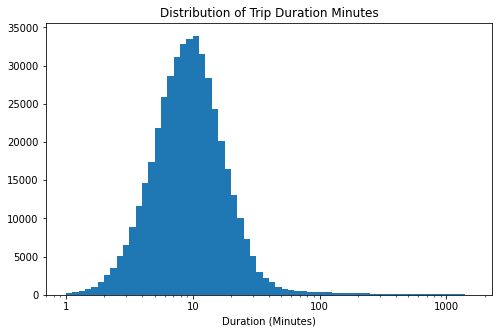

In [20]:
# there is a long tail in the distribution 
# ploting histogram using log scale
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minutes'].max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_minutes', bins = bins)
plt.xlabel('Duration (Minutes)')
plt.xscale('log')
plt.xticks([1e0, 1e1, 1e2, 1e3],['1', '10', '100', '1000'])
plt.title('Distribution of Trip Duration Minutes')
plt.show()

The distribution looks normal, most of the trips duration are less than 20 minutes. There is also some outliers  on the right side of the distribution.

### What is the Distribution of Users Age?

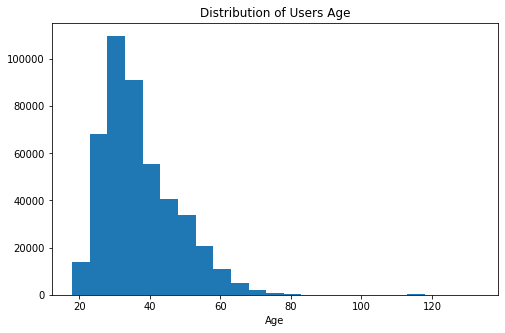

In [21]:
binsize = 5
bins = np.arange(18, df_clean['user_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'user_age', bins = bins)
plt.xlabel('Age')
plt.title('Distribution of Users Age')
plt.show()

From the distribution, most of the bike riders are between the age 18 and 40, which can be considered as youths. There is outliers between age of 80 and 120, this maybe a data entry error.

### How do bike trips vary by time of the day?

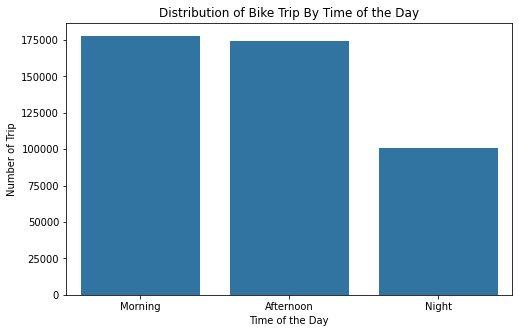

In [22]:
default_color = sb.color_palette()[0]
plt.figure(figsize=[8, 5])
sb.countplot(data = df_clean, x = 'period', color = default_color)
plt.ylabel('Number of Trip')
plt.xlabel('Time of the Day')
plt.title('Distribution of Bike Trip By Time of the Day')
plt.show()

As expected, there are more trips during the day (Morning and Afternoon) and less trip in the night

### Which start station are the most popular?

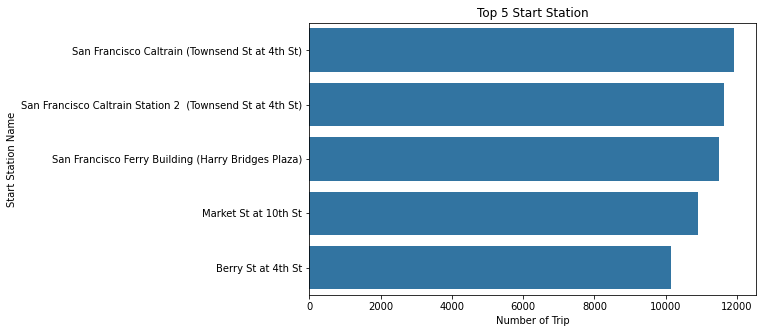

In [23]:
y = df_clean['start_station_name'].value_counts()[0:5].index.tolist()
x = df_clean['start_station_name'].value_counts()[0:5].tolist()
plt.figure(figsize=[8, 5])
sb.barplot(y=y,x=x, color = default_color)
plt.ylabel('Start Station Name')
plt.xlabel('Number of Trip')
plt.title('Top 5 Start Station')
plt.show()

I discovered that the top 2 start station are located within Caltrain station. This is due to the fact that Caltrain station offers rail line service to thousand of commuters everyday. The third station is located at a Ferry terminal.

### Which end station are the most popular?

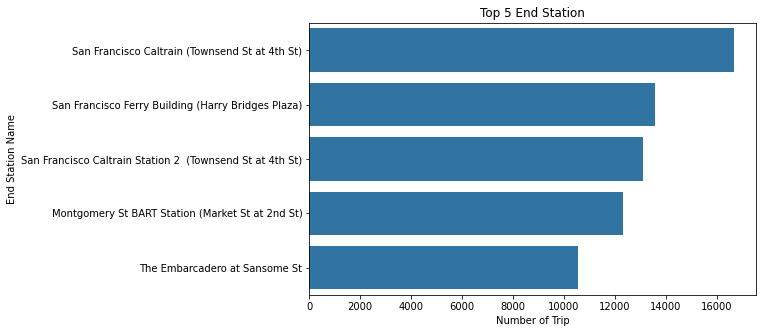

In [24]:
y = df_clean['end_station_name'].value_counts()[0:5].index.tolist()
x = df_clean['end_station_name'].value_counts()[0:5].tolist()
plt.figure(figsize=[8, 5])
sb.barplot(y=y,x=x, color = default_color)
plt.ylabel('End Station Name')
plt.xlabel('Number of Trip')
plt.title('Top 5 End Station')
plt.show()

The popular end stations are similar to that of the start station. This means that most riders start/end their trip at these stations.

### What is the distribution of user type?

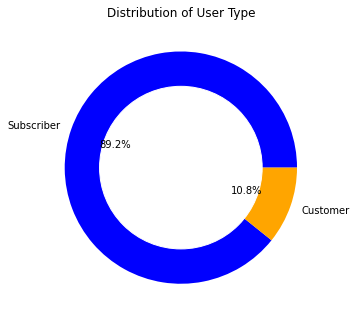

In [25]:
values = df_clean['user_type'].value_counts().tolist()
labels =  df_clean['user_type'].value_counts().index.tolist()
colors = ['#0000FF', '#FFA500']

# explosion
explode = (0.01,0.01)

# Create a circle at the center of the plot
plt.figure(figsize=[5, 5])
my_circle = plt.Circle((0, 0), 0.7, color='white')
  
# Give color names
plt.pie(values, labels=labels, autopct='%1.1f%%',
        colors=colors)
  
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.tight_layout()
plt.title('Distribution of User Type')
# Show the graph
plt.show()

It is not suprising that almost 90% of users are subscribers. This is mainly due to pricing plan.

### Which user type take longer or shorter trip?

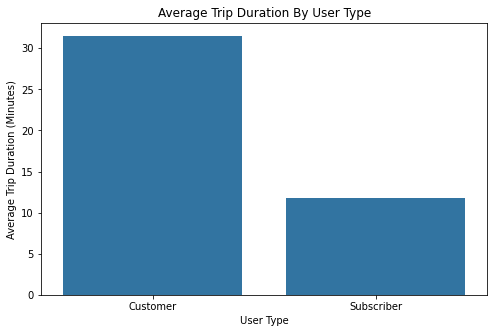

In [26]:
user_time = df_clean.groupby('user_type').duration_minutes.mean()
plt.figure(figsize=[8, 5])
sb.barplot(x=user_time.index, y= user_time, color = default_color)
plt.ylabel('Average Trip Duration (Minutes)')
plt.xlabel('User Type')
plt.title('Average Trip Duration By User Type')
plt.show()

Customers take much longer ride on average (above 30 minutes) than subscriber. Most customers might be unaware of the charges incured when you take a ride above 30 minutes. They might also be tourist who came to explore the city.

### What is the distribution of gender?

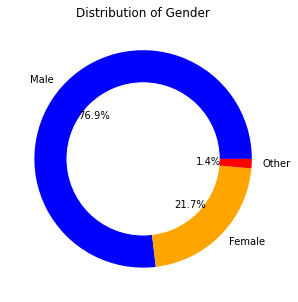

In [27]:
values = df_clean['member_gender'].value_counts().tolist()
labels =  df_clean['member_gender'].value_counts().index.tolist()
colors = ['#0000FF', '#FFA500', '#FF0000']
# explosion
explode = (0.01,0.01)

# Create a circle at the center of
# the plot
plt.figure(figsize=[5, 5])
my_circle = plt.Circle((0, 0), 0.7, color='white')
  
# Give color names
plt.pie(values, labels=labels, autopct='%1.1f%%',
        colors=colors)
  
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of Gender')
  
# Show the graph
plt.show()

The Male gender make use of Ford GoBike than thier female counterpart. 1.4% of users did not reveal their gender or they are data entry issues.

### Which gender take longer or shorter trip?

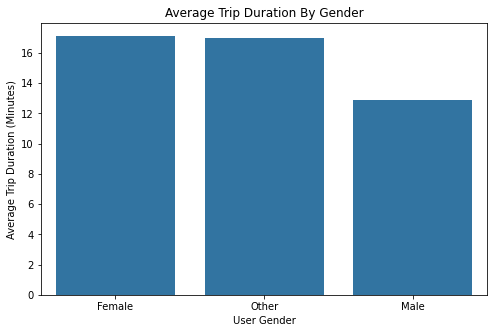

In [28]:
gender_time = df_clean.groupby('member_gender').duration_minutes.mean().sort_values(ascending = False)
plt.figure(figsize=[8, 5])
sb.barplot(x=gender_time.index, y= gender_time, color = default_color)
plt.ylabel('Average Trip Duration (Minutes)')
plt.xlabel('User Gender')
plt.title('Average Trip Duration By Gender')
plt.show()

Female spend above 16 minutes on average on bike rides, while Male spend less time on average.

### What days of the week are most bike ride taken on?

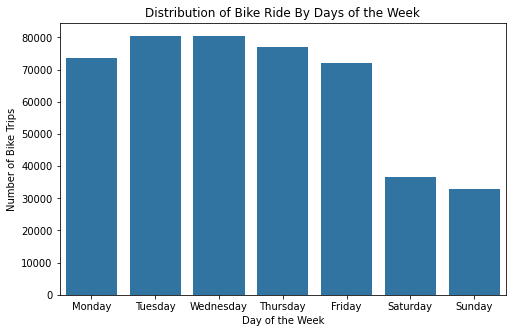

In [32]:
plt.figure(figsize = [8,5])
sb.countplot(data=df_clean, x= 'day', color = default_color)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bike Trips')
plt.title('Distribution of Bike Ride By Days of the Week');

We have high number of  trips on Weekdays (Monday to Friday), most users dont make use of bike ride on Weekend (Saturday and Sunday)

### What is the distribution of bike rides by month?

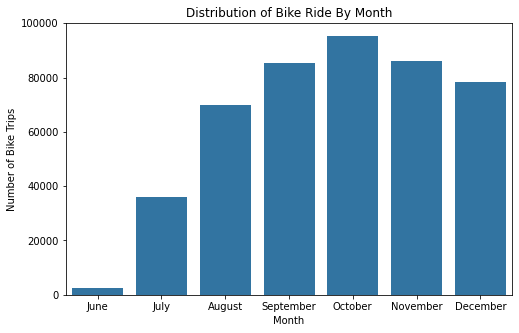

In [30]:
plt.figure(figsize = [8,5])
sb.countplot(data=df_clean, x= 'month', color = default_color)
plt.xlabel('Month')
plt.ylabel('Number of Bike Trips')
plt.title('Distribution of Bike Ride By Month');

The number of rides taken in June was very low compared to other Months. I discovered that the low value is due to the fact Ford GoBike was launched on 27th of June, 2017.

## Bivariate Exploration

### How do days of week affect trip duration?

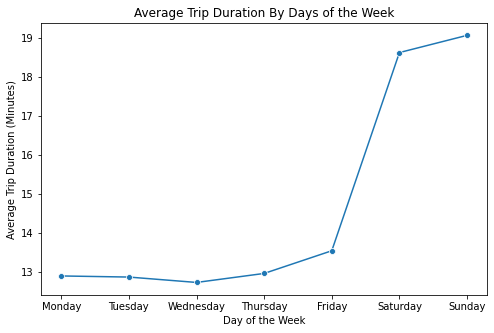

In [31]:
days_mean = df_clean.groupby('day')['duration_minutes'].mean()
plt.figure(figsize = [8,5])
sb.lineplot(x= days_mean.index, y = days_mean, color = default_color, marker = 'o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (Minutes)')
plt.title('Average Trip Duration By Days of the Week');

Users dont spend most time riding bike during weekdays especially Monday to Thursday; but during the weekend, users average trip duration increased. It seems users have more time on weekend to ride bike within city.

### How do month of the year affect trip duration?

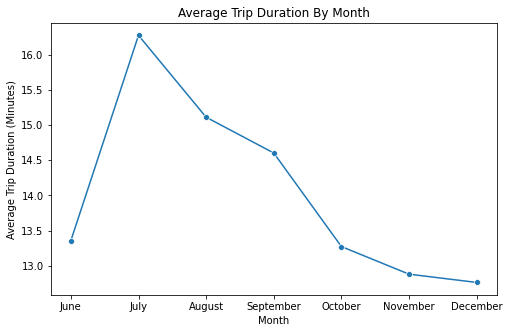

In [33]:
month_mean = df_clean.groupby('month')['duration_minutes'].mean()
plt.figure(figsize = [8,5])
sb.lineplot(x= month_mean.index, y = month_mean, color = default_color, marker = 'o')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (Minutes)')
plt.title('Average Trip Duration By Month');

Average trip duration increased greatly from June to July, then began to drop steadily every month till December

## Multivariate Exploration


### What is avearge trip duration by days of the week and user type

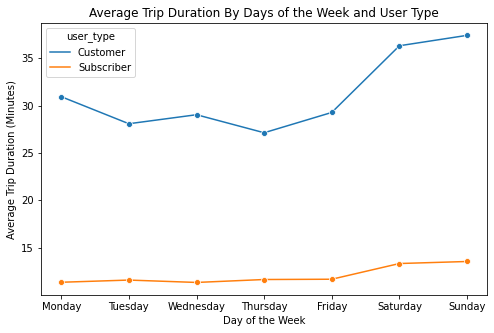

In [34]:
days_user_mean = df_clean.groupby(['day','user_type'])['duration_minutes'].mean()
days_user_mean = days_user_mean.reset_index()
plt.figure(figsize = [8,5])
sb.lineplot(data = days_user_mean, x= 'day', y = 'duration_minutes', hue = 'user_type', color = default_color, marker = 'o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (Minutes)')
plt.title('Average Trip Duration By Days of the Week and User Type');

All through the days of the week, customer average trip duration is always higher than subscriber average trip duration.

### What is avearge trip duration by month and user type

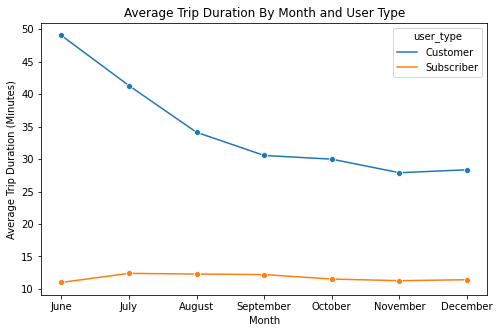

In [35]:
month_user_mean = df_clean.groupby(['month','user_type'])['duration_minutes'].mean()
month_user_mean = month_user_mean.reset_index()
plt.figure(figsize = [8,5])
sb.lineplot(data = month_user_mean, x= 'month', y = 'duration_minutes', hue = 'user_type', marker = 'o')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (Minutes)')
plt.title('Average Trip Duration By Month and User Type');

Customers average trip duration reduced every month from June to July, while subscriber avergae trip duration is maintained between 10 to 15 minutes.